In [3]:
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

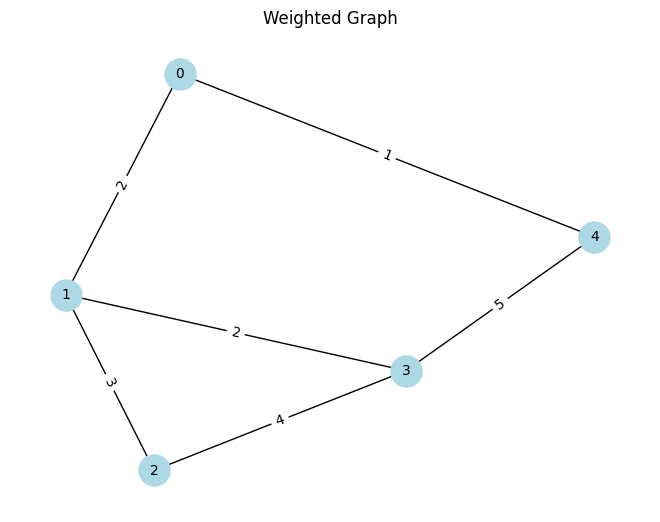

In [2]:
# Define the number of nodes
num_nodes = 5

# Create a three-dimensional adjacency matrix
# The third dimension size 2: first for presence, second for weight
adj_matrix = np.zeros((num_nodes, num_nodes, 2))

# Define the edges and their weights
edges = [(0, 1, 2), (0, 4, 1), (1, 2, 3), (2, 3, 4), (3, 4, 5), (1, 3, 2)]

# Fill the adjacency matrix with edge presence and weights
for edge in edges:
    u, v, weight = edge
    adj_matrix[u, v] = [1, weight]
    adj_matrix[v, u] = [1, weight]  # Assuming the graph is undirected

# Create a NetworkX graph
G = nx.Graph()

# Add edges with weights to the graph
for i in range(num_nodes):
    for j in range(num_nodes):
        if adj_matrix[i, j, 0] == 1:
            G.add_edge(i, j, weight=adj_matrix[i, j, 1])

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=10)

# Draw edge labels
edge_labels = {(u, v): f'{d["weight"]:.0f}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Weighted Graph")
plt.show()

In [3]:
adj_matrix

array([[[0., 0.],
        [1., 2.],
        [0., 0.],
        [0., 0.],
        [1., 1.]],

       [[1., 2.],
        [0., 0.],
        [1., 3.],
        [1., 2.],
        [0., 0.]],

       [[0., 0.],
        [1., 3.],
        [0., 0.],
        [1., 4.],
        [0., 0.]],

       [[0., 0.],
        [1., 2.],
        [1., 4.],
        [0., 0.],
        [1., 5.]],

       [[1., 1.],
        [0., 0.],
        [0., 0.],
        [1., 5.],
        [0., 0.]]])

In [22]:
def dijkastra(WMat, s):
    rows, cols, x = WMat.shape
    infinity = np.max(WMat) * rows + 1  # set the max value as infinity
    visited, distance = {}, {}  # dict to keep track of the distance and visited
    for vertex in range(rows):
        visited[vertex], distance[vertex] = False, infinity
    # starting vertex
    distance[s] = 0
    for u in range(rows):
        nextd = min([distance[v] for v in range(rows) if not visited[v]])
        nextvlist = [
            v for v in range(rows) if (not visited[v]) and distance[v] == nextd
        ]
        # print(nextvlist)
        if nextvlist == []:
            break
        nextv = min(nextvlist)
        visited[nextv] = True
        for v in range(cols):
            if WMat[nextv, v, 0] == 1 and not visited[v]:
                distance[v] = min(distance[v], distance[nextv] + WMat[nextv, v, 1])
    return distance

In [29]:
distance = dijkastra(WMat=adj_matrix, s=0)

In [24]:
plt.show()

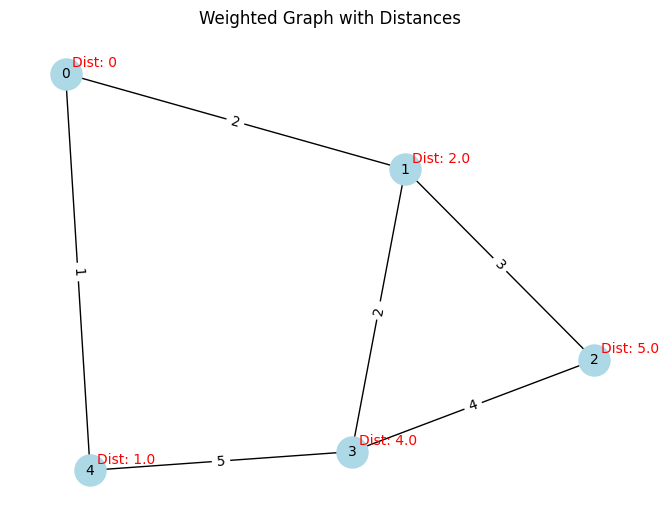

In [30]:
G = nx.Graph()

# Add edges with weights to the graph
for i in range(num_nodes):
    for j in range(num_nodes):
        if adj_matrix[i, j, 0] == 1:
            G.add_edge(i, j, weight=adj_matrix[i, j, 1])


# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=10)

# Draw edge labels
edge_labels = {(u, v): f'{d["weight"]:.0f}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Add the distance information to the plot
for node, dist in distance.items():
    plt.annotate(
        f"Dist: {dist}",
        xy=pos[node],
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=10,
        color="red",
    )

plt.title("Weighted Graph with Distances")
plt.show()

# Lecture 5.2 - Single Source Shortest Paths (Dijkstra_s algorithm).pdf (PDF file)

**Summary**
**Single Source Shortest Paths**

The Dijkstra's algorithm is used to find the shortest paths from a single source vertex to all other vertices in a weighted graph. The algorithm maintains two dictionaries with vertices as keys:

- visited: initially False for all vertices (burnt vertices)
- distance: initially infinity for all vertices (expected burn time)

The distance of the source vertex is set to 0. The algorithm then repeats until all reachable vertices are visited:

- Find the unvisited vertex nextv with minimum distance
- Set visited[nextv] to True
- Recompute distance[v] for every neighbor v of nextv

**Complexity**

The complexity of the algorithm is O(n^2), where n is the number of vertices in the graph. The setting of infinity takes O(n^2) time, the main loop runs n times, and each iteration visits one more vertex. It takes O(n) time to find the next vertex to visit and O(n) time to update distance[v] for neighbors.

**Proof of Correctness**

The proof of correctness of Dijkstra's algorithm relies on the assumption that each new shortest path we discover extends an earlier one. By induction, we assume that we have found the shortest paths to all vertices already burned. The next vertex to burn is v, via x. We cannot find a shorter path later from y to v via w because the burn time of w is greater than or equal to the burn time of v, and the edge from w to v has a weight greater than or equal to 0. This argument breaks down if the edge (w,v) can have a negative weight, in which case Dijkstra's algorithm cannot be used.

**Implementation**

The following Python code implements Dijkstra's algorithm:

```python
def dijkstra(WMat,s):
    (rows,cols,x) = WMat.shape
    infinity = np.max(WMat)*rows+1
    (visited,distance) = ({},{})
    for v in range(rows):
        (visited[v],distance[v]) = (False,infinity)
    distance[s] = 0
    for u in range(rows):
        nextd = min([distance[v] for v in range(rows)
            if not visited[v]])
        nextvlist = [v for v in range(rows)
            if (not visited[v]) and
            distance[v] == nextd]
        if nextvlist == []:
            break
        nextv = min(nextvlist)
        visited[nextv] = True
        for v in range(cols):
            if WMat[nextv,v,0] == 1 and (not visited[v]):
                distance[v] = min(distance[v],distance[nextv]
                    +WMat[nextv,v,1])
    return(distance)
```

**Summary**

Dijkstra's algorithm is a greedy algorithm that computes single source shortest paths. The correctness of the algorithm requires edge weights to be non-negative. The complexity of the algorithm is O(n^2), even with adjacency lists. The bottleneck is identifying the unvisited vertex with the minimum distance, which requires a better data structure for efficient identification and removal of minimum (or maximum) elements from a collection.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_weighted_graph_with_distances(num_nodes, adj_matrix, distance):
    """
    Draws a weighted graph with distances annotated on the nodes.

    Parameters:
    - num_nodes: int, the number of nodes in the graph.
    - adj_matrix: numpy array, adjacency matrix where adj_matrix[i, j, 0] indicates the presence of an edge
                  and adj_matrix[i, j, 1] indicates the weight of the edge.
    - distance: dict, a dictionary where keys are node indices and values are distances to be annotated.
    """
    G = nx.Graph()

    # Add edges with weights to the graph
    for i in range(num_nodes):
        for j in range(num_nodes):
            if adj_matrix[i, j, 0] == 1:
                G.add_edge(i, j, weight=adj_matrix[i, j, 1])

    # Draw the graph
    pos = nx.spring_layout(G)  # Positions for all nodes
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=10)

    # Draw edge labels
    edge_labels = {(u, v): f'{d["weight"]:.0f}' for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    # Add the distance information to the plot
    for node, dist in distance.items():
        plt.annotate(
            f"Dist: {dist}",
            xy=pos[node],
            xytext=(5, 5),
            textcoords="offset points",
            fontsize=10,
            color="red",
        )

    plt.title("Weighted Graph with Distances")
    plt.show()



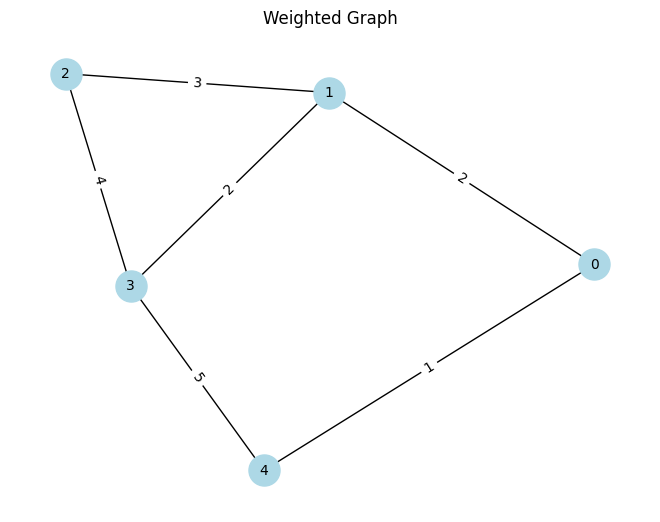

In [4]:
# Define the number of nodes
num_nodes = 5

# Create a three-dimensional adjacency matrix
# The third dimension size 2: first for presence, second for weight
adj_matrix = np.zeros((num_nodes, num_nodes, 2))

# Define the edges and their weights
edges = [(0, 1, 2), (0, 4, 1), (1, 2, 3), (2, 3, 4), (3, 4, 5), (1, 3, 2)]

# Fill the adjacency matrix with edge presence and weights
for edge in edges:
    u, v, weight = edge
    adj_matrix[u, v] = [1, weight]
    adj_matrix[v, u] = [1, weight]  # Assuming the graph is undirected

# Create a NetworkX graph
G = nx.Graph()

# Add edges with weights to the graph
for i in range(num_nodes):
    for j in range(num_nodes):
        if adj_matrix[i, j, 0] == 1:
            G.add_edge(i, j, weight=adj_matrix[i, j, 1])

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=10)

# Draw edge labels
edge_labels = {(u, v): f'{d["weight"]:.0f}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Weighted Graph")
plt.show()